In [2]:
#to export a notebook to html use:
# >ipython nbconvert --to html Process-GitHub-Repos.ipynb

from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import string
from datetime import datetime, date, time

import re
%pylab inline
import numpy as np
import scipy as sc
import scipy.stats as stats
from scipy.optimize import leastsq
from graphviz import Digraph
import operator

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
def create_digraph(nodes_dict, edges_dict):
    dot = Digraph(comment='The matrix')
#     items = set([item for sublist in nodes_dict.keys() for item in sublist])
    for item,w in nodes_dict.items():
        w = nodes_dict[item]
        dot.node(str(item), str(item)+"\n"+str(round(w,2)), width=str(2*w),height=str(2*w))

    for k in edges_dict.keys():
        w = edges_dict[k]
        dot.edge(str(k[0]), str(k[1]),penwidth=str(3*w),label=str(round(w,2)))

    return dot

In [4]:
from collections import Counter

data_file = './datasets/msnbc990928.seq'
file = open(data_file, 'r')

In [5]:
state_cnt = Counter()
# overall_state_trans = Counter()
list_state_trans = []
# list_state_visit = []
for index,line in enumerate(file):
    if index<7:
        continue
    if index >50000:
        break
#   print index," : ",line.split()
    traj = line.split()
    if len(traj)>500:
        continue
        
#     state_cnt = Counter()
    for state in traj:
        state_cnt[int(state)]+=1
#     list_state_visit.append(state_cnt)
    
    traj = ['0']+line.split()
    state_trans_cnt = Counter()
    for prevstate,state in zip(traj[:-1],traj[1:]):
#         state_trans_cnt[prevstate+">"+state]+=1
        state_trans_cnt[(prevstate,state)]+=1
#         overall_state_trans[prevstate+">"+state]+=1

    list_state_trans.append(state_trans_cnt)

In [17]:
list_state_trans

[Counter({('0', '1'): 1, ('1', '1'): 1}),
 Counter({('0', '2'): 1}),
 Counter({('2', '2'): 3, ('0', '3'): 1, ('2', '3'): 1, ('3', '2'): 1, ('3', '3'): 1, ('2', '4'): 1, ('4', '2'): 1}),
 Counter({('0', '5'): 1}),
 Counter({('0', '1'): 1}),
 Counter({('0', '6'): 1}),
 Counter({('0', '1'): 1, ('1', '1'): 1}),
 Counter({('0', '6'): 1}),
 Counter({('8', '8'): 3, ('7', '7'): 2, ('7', '6'): 1, ('6', '7'): 1, ('6', '6'): 1, ('0', '6'): 1, ('6', '8'): 1}),
 Counter({('4', '4'): 4, ('10', '4'): 1, ('5', '10'): 1, ('4', '10'): 1, ('6', '9'): 1, ('10', '3'): 1, ('10', '5'): 1, ('0', '6'): 1, ('9', '4'): 1, ('3', '10'): 1}),
 Counter({('1', '1'): 4, ('11', '1'): 1, ('1', '11'): 1, ('0', '1'): 1}),
 Counter({('0', '12'): 1, ('12', '12'): 1}),
 Counter({('0', '1'): 1, ('1', '1'): 1}),
 Counter({('8', '8'): 5, ('0', '8'): 1}),
 Counter({('0', '6'): 1}),
 Counter({('0', '2'): 1}),
 Counter({('0', '9'): 1, ('9', '12'): 1}),
 Counter({('0', '3'): 1}),
 Counter({('0', '9'): 1}),
 Counter({('0', '3'): 1})

In [6]:
features_number = len(state_cnt.keys())+1
co = 0
trans_mtrx_list = []
for tv in list_state_trans:    
    trans_mtrx_sparse = sc.sparse.dok_matrix((features_number,features_number), dtype=np.float16)

    for t,c in tv.iteritems():
        trans_mtrx_sparse[int(t[0]), int(t[1])] = int(c)
#         trans_vctr = np.squeeze(np.asarray(trans_mtrx_sparse.todense()))
#         trans_vctr = np.squeeze(trans_mtrx_sparse.todense())
    trans_mtrx_flat = np.asarray(trans_mtrx_sparse.todense()).flatten()
    co = co + 1
    trans_mtrx_list.append(trans_mtrx_flat)

In [7]:
trans_mtrx_df = DataFrame(trans_mtrx_list)
# trans_mtrx_df = df_state_visit.fillna(0)
trans_mtrx_df.head()

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
trans_mtrx_df

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import sklearn.cluster
from sklearn.cluster import MiniBatchKMeans, KMeans

trans_mtrx = trans_mtrx_df.as_matrix()
k_means = sklearn.cluster.KMeans(n_clusters=10, init='k-means++',n_jobs=2)
k_means.fit(trans_mtrx)

# Get cluster assignment labels
# return k_means.labels_,k_means.cluster_centers_

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=2, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(trans_mtrx, k_means.labels_, metric='euclidean',sample_size =10000)

0.56608231619799465

In [11]:
#add cluster labels to jorney vectors DataFrame
trans_res_df = DataFrame(trans_mtrx_df)
trans_res_df['k_means_labels'] = k_means.labels_
trans_res_df

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,k_means_labels
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [12]:
#sum all vectors that belong to same cluster 
trans_res_sum_df = trans_res_df.groupby(['k_means_labels'], axis=0).sum()
trans_res_sum_df

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
k_means_labels,,,,,,,,,,,,,,,,,,,,,
0,0,1504,12,5,3,0,16,3,6,8,...,0,1,1,6,0,0,0,0,0,7
1,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,41,0,3,4,29,8,1,0,32,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,63,1,0,0,0,32,4,3,6,...,1,0,0,2,0,0,0,0,0,7
6,0,60,4,5,161,0,19,7,9,21,...,0,0,0,2,1,0,0,0,0,6
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,12518,3823,3446,2449,186,8029,173,2758,3126,...,3,4,14,78,6,1,8,1,0,189


In [13]:
#calculate nodes weights and transitions probabilities matrices for each cluster
cls_sum_matrices_list = []
cls_nodes_sum_matrices_list = []
m = trans_res_sum_df.as_matrix()
for cl in m:
    cls_mtrx = cl.reshape(features_number,features_number)
    
    cls_mtrx_colsum = cls_mtrx.sum(axis=0)/cls_mtrx.sum()    
    cls_nodes_sum_matrices_list.append(cls_mtrx_colsum)
    
    cls_mtrx_rowsum = cls_mtrx.sum(axis=1)    
    cls_mtrx_normT = cls_mtrx.T/cls_mtrx_rowsum    
    cls_mtrx_normT[isnan(cls_mtrx_normT)] = 0
    cls_sum_matrices_list.append(cls_mtrx_normT.T)

cls_nodes_sum_matrices_list[1]

array([  0.00000000e+00,   9.35371179e-01,   1.31004367e-02,
         4.36681223e-03,   1.74672489e-03,   8.73362445e-04,
         3.49344978e-03,   3.49344978e-03,   0.00000000e+00,
         0.00000000e+00,   1.74672489e-03,   5.24017467e-03,
         2.70742358e-02,   0.00000000e+00,   3.49344978e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [14]:
nodes = {}
for index,w in np.ndenumerate(cls_nodes_sum_matrices_list[0]):  
    nodes[str(index[0])]=w

Populating the interactive namespace from numpy and matplotlib


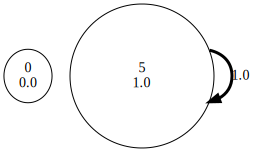

In [15]:
ind = 7
cur_cls_trans_probs = cls_sum_matrices_list[ind]
cur_cls_nodes_weight = cls_nodes_sum_matrices_list[ind]



w_accum = 0.0
max_w = 0.95
nodes = {}
# for index,w in np.ndenumerate(cur_cls_nodes_weight):
for index,w in sorted(np.ndenumerate(cur_cls_nodes_weight), key=operator.itemgetter(1), reverse=True):
    if w_accum < max_w and w > 0.02 or index[0] == 0:        
#         print index,w
        w_accum += w
        nodes[str(index[0])]=w
        
    
from collections import OrderedDict
edges = OrderedDict()
for index,p in np.ndenumerate(cur_cls_trans_probs):
    
    if p > 0.05 and str(index[1]) in nodes and str(index[0]) in nodes:
#         print index[1],p
        edges[index] = p


#     print index,w
#     if w > 0.0 or index[0]==0:
#         print w
        

# for n,p in nodes.iteritems():
#     print n,p
%pylab inline
create_digraph(nodes, edges)
# od1

In [16]:
a = numpy.arange(9.0).reshape(3,3)
r_sum = a.sum(axis=1)
norm_a = a.T/r_sum
trans_p_mtrx = norm_a.T
trans_p_mtrx

array([[ 0.        ,  0.33333333,  0.66666667],
       [ 0.25      ,  0.33333333,  0.41666667],
       [ 0.28571429,  0.33333333,  0.38095238]])

In [ ]:
import operator
# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
x = edges
sorted_x = sorted(np.ndenumerate(cur_cls_nodes_weight), key=operator.itemgetter(1), reverse=True)

sorted_x

In [ ]:
a = numpy.arange(9.0).reshape(3,3)
a

In [ ]:
r_sum = a.sum(axis=0)
r_sum

In [12]:
from sklearn.metrics.cluster import completeness_score
completeness_score([0, 0, 1, 1], [0, 1, 1, 1])

0.38368854659634433